<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades 

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 


Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones por pares entre las variables para considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales. 
 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [1]:
# Utilice este espacio para escribir el código.
#Cargamos las librerías a utilizar
import pandas as pd
import numpy as np


# Cargamos y visualizamos la primeras observaciones de los datos
lugares = pd.read_csv('data/lugares.csv')
lugares = lugares.set_index("Ciudad")
lugares.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


Para este primer paso, llamamos el archivo "Lugares", el cual contiene información de la calidad de vida en una muestra de ciudades a partir de nueve criterios: 

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 

Declaramos la variable Ciudades como el índice de nuestro dataframe.

### 2.  Análisis descriptivo de las variables. 

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables. 

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.
 
Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.


* ### Importancia del análisis descriptivo
El análisis descriptivo de los datos es un componente crucial de cualquier análisis de datos. Antes de poder realizar inferencias o predicciones basadas en nuestros datos, necesitamos entender las características básicas de los mismos y como puede esta afectar los resultados de análisis posteriores. Esto incluye entender la variación y distribución de los datos, la presencia de valores atípicos, entre otros.

Esta información, para el caso particular de Análisis de Componentes Principales (PCA), nos permite intuir de manera temprana si la alta correlación entre variables es señal de que la información recogida en ellas se puede sintetizar en un único componente que nos ayuda a reducir la dimensión de nuestra información y con ello, modelar de manera más eficiente nuestros datos. 

Las estadísticas descriptivas nos proporcionan esta información. Algunas de las estadísticas descriptivas más comunes incluyen la media, la mediana, el rango, la desviación estándar, y los percentiles. Además, las visualizaciones de datos, como los histogramas y correlogramas,  pueden proporcionar información valiosa sobre la distribución y las relaciones subyacentes en los datos.

* ### Analizando nuestra base de datos

In [4]:
#Identificamos la dimensión de nuestros datos
lugares.shape

(329, 9)

Encontramos que la dimensión de la matriz a analizar es de 329 filas (registros) para 9 columnas (variables). Así que con ese número de variables se deberían examinar aproximadamente: 


\begin{align}
\frac{K(K-1)}{2}
\end{align}

Donde K = 9, entonces:

\begin{align}
\frac{9(9-1)}{2} = {36} \ \text{gráficas de dispersion.}
\end{align}

In [5]:
lugares.describe().T

,count,mean,std,min,25%,50%,75%,max
Clima y Terreno,329.0,538.732523,120.808259,105.0,480.0,542.0,592.0,910.0
Alojamiento,329.0,8346.559271,2385.262622,5159.0,6760.0,7877.0,9015.0,23640.0
Cuidado de la salud y el medio ambiente,329.0,1185.738602,1003.002036,43.0,583.0,833.0,1445.0,7850.0
Crimen,329.0,961.054711,357.154186,308.0,707.0,947.0,1156.0,2498.0
Transporte,329.0,4210.082067,1451.179240,1145.0,3141.0,4080.0,5205.0,8625.0
Educación,329.0,2814.887538,320.792953,1701.0,2619.0,2794.0,3012.0,3781.0
Artes,329.0,3150.884498,4642.283738,52.0,778.0,1871.0,3844.0,56745.0
Recreación,329.0,1845.957447,807.888171,300.0,1316.0,1670.0,2176.0,4800.0
Economía,329.0,5525.364742,1084.468523,3045.0,4842.0,5384.0,6113.0,9980.0


In [6]:
# Utilice este espacio para escribir el código.
#Calculamos matriz de correlaciones
matriz_correlaciones = lugares.corr()
matriz_correlaciones

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Clima y Terreno,1.000000,0.386291,0.213303,0.192387,0.079120,0.064520,0.226974,0.213509,-0.100083
Alojamiento,0.386291,1.000000,0.453010,0.134222,0.271922,0.197934,0.448568,0.422288,0.269433
Cuidado de la salud y el medio ambiente,0.213303,0.453010,1.000000,0.304659,0.470317,0.490234,0.865796,0.325397,0.069271
Crimen,0.192387,0.134222,0.304659,1.000000,0.286578,0.074416,0.389483,0.344627,0.259995
Transporte,0.079120,0.271922,0.470317,0.286578,1.000000,0.335992,0.464806,0.364716,0.059247
Educación,0.064520,0.197934,0.490234,0.074416,0.335992,1.000000,0.373279,0.077807,0.119700
Artes,0.226974,0.448568,0.865796,0.389483,0.464806,0.373279,1.000000,0.378659,0.075673
Recreación,0.213509,0.422288,0.325397,0.344627,0.364716,0.077807,0.378659,1.000000,0.173531
Economía,-0.100083,0.269433,0.069271,0.259995,0.059247,0.119700,0.075673,0.173531,1.000000


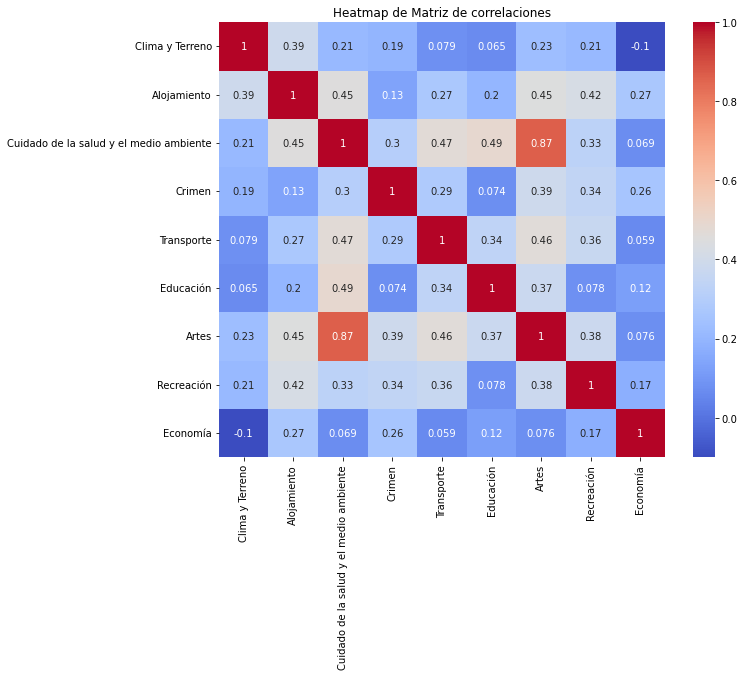

In [7]:
# Importamos matplotlib y seaborn para visualizar datos
import seaborn as sns
import matplotlib.pyplot as plt



# Creamos un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm')
plt.title('Heatmap de Matriz de correlaciones')
plt.show()

Al realizar el analisis de correlaciones entre las 9 componentes o variables relevantes encontramos en que en su gran mayoria no existen problemas graves de correlación, con una tendencia al rededor de 0.0 y 0.4. Sin embargo, las componentes que representan **_"Artes"_** y **_"Cuidado de la salud y el medio ambiente"_** tienen una correlación alta de 0.87. Lo cual nos lleva a intuir que una sola de ellas seria suficiente para aportar la información relevante sobre esos dos criterios (Tal como sucedió con la construcción del primer componente principal que describiremos más adelante en este informe). Sin embargo, continuaremos con el análisis bivariado de forma gráfica para analizar relaciones lineales:

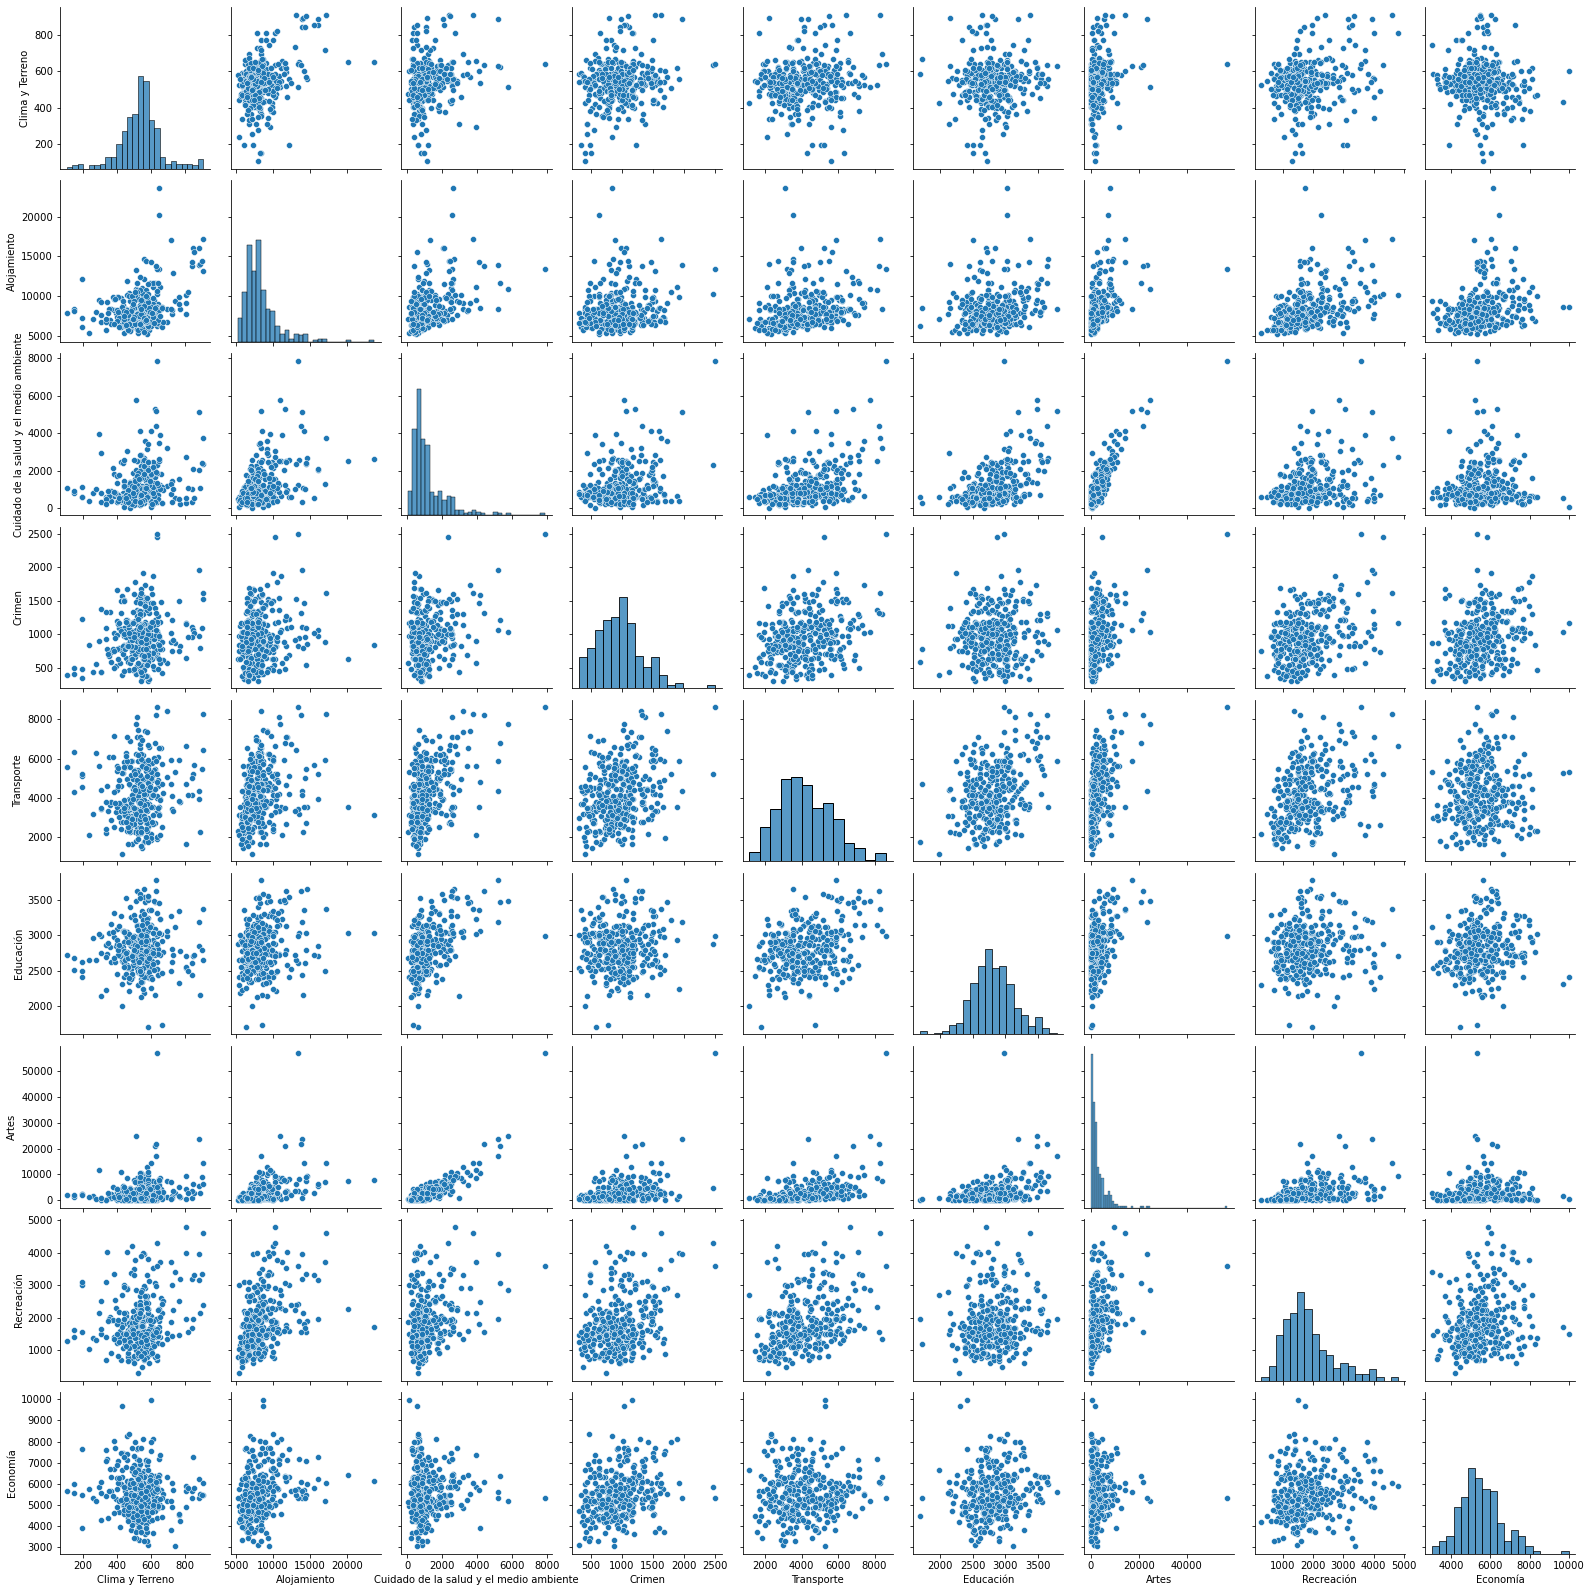

In [8]:
variables = ['Clima y Terreno','Alojamiento','Cuidado de la salud y el medio ambiente','Crimen','Transporte','Educación','Artes','Recreación','Economía']

# Create scatter plots
g= sns.pairplot(lugares[variables])
plt.show()

Como podemos observar, existen 36 gráficos de dispersion tal cual como lo calculamos al inicio. Y aunque en el analisis bivariado de dispersión no se observa una tendencia entre las variables de los datos, si podemos encontrar de nuevo la relación lineal entre **_"Artes"_** y **_"Cuidado de la salud y el medio ambiente"_** dandonos una explicación gráfica de su correlación.

### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso. 

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

* ### Normalizar las variables
Cuando usamos PCA buscamos maximizar varianza y la varianza se ve afectada por las unidades de medida. Esto implica que los componentes principales basados en la matriz de covarianza van a cambiar si las unidades de medida de una o más variables cambian. Así las cosas, para evitar esto, es práctica habitual  estandarizar las variables. Es decir, cada valor de $X$ es centrados y dividido por la desviación estándar:

\begin{align}
z_{ij} = \frac{x_{ij}-\bar{x_j}}{s_j}
\end{align}

donde $\bar{x_j}$ es la media y ${s_j}$ es el desvío estándar de la columna $j$. Entonces, la matriz de datos iniciales es remplazada por la matriz de datos estandarizados $Z$. Así mismo, al estandarizar la matriz de datos, la matriz de covarianza $S$ es simplemente la matriz de correlación de los datos original.

Esto contrasta con otras técnicas de aprendizaje supervisado como la regresión lineal, donde escalar las variables no tiene ningún efecto.

In [9]:
# Estandarizamos los datos
mu = lugares.mean()
sigma = lugares.std()
Z = (lugares - mu)/sigma
Z.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",-0.146782,-0.899926,-0.945899,-0.106550,-0.123405,-0.180451,-0.464186,-0.545815,1.943473
"Akron,OH",0.300207,-0.087437,0.468854,-0.210147,0.463704,-1.174862,0.519812,0.972960,-1.083816
"Albany,GA",-0.585494,-0.422410,-0.566039,0.025046,-1.157047,-0.794555,-0.627683,-1.221651,-0.253917
"Albany-Schenectady-Troy,NY",-0.519273,-0.183862,0.244527,-0.982922,1.841894,1.820839,0.324003,-0.283402,0.312259
"Albuquerque,NM",0.995524,0.019470,0.665264,1.461400,1.617938,0.658096,0.289753,0.948204,0.185930


In [10]:
# Utilice este espacio para escribir el código.
S = Z.cov()
S

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Clima y Terreno,1.000000,0.386291,0.213303,0.192387,0.079120,0.064520,0.226974,0.213509,-0.100083
Alojamiento,0.386291,1.000000,0.453010,0.134222,0.271922,0.197934,0.448568,0.422288,0.269433
Cuidado de la salud y el medio ambiente,0.213303,0.453010,1.000000,0.304659,0.470317,0.490234,0.865796,0.325397,0.069271
Crimen,0.192387,0.134222,0.304659,1.000000,0.286578,0.074416,0.389483,0.344627,0.259995
Transporte,0.079120,0.271922,0.470317,0.286578,1.000000,0.335992,0.464806,0.364716,0.059247
Educación,0.064520,0.197934,0.490234,0.074416,0.335992,1.000000,0.373279,0.077807,0.119700
Artes,0.226974,0.448568,0.865796,0.389483,0.464806,0.373279,1.000000,0.378659,0.075673
Recreación,0.213509,0.422288,0.325397,0.344627,0.364716,0.077807,0.378659,1.000000,0.173531
Economía,-0.100083,0.269433,0.069271,0.259995,0.059247,0.119700,0.075673,0.173531,1.000000


Los valores propios son las raíces de la ecuación:

$$|S-\lambda I| =0 $$

y los obtenemos en `Python` con:

In [11]:
eig_val, eig_vec = np.linalg.eig(S)
eig_val

array([3.4082918 , 1.21397617, 1.14147915, 0.92091782, 0.75328488,
       0.6305619 , 0.49304772, 0.31803849, 0.12040208])

Vamos a utilizar el criterio de Kaiser para evaluar el número máximo de componentes principales. Este sugiere que solo se retengan los componentes principales cuyos eigenvalores sean mayores a 1. La idea es que se retengan aquellos componentes cuyos eigenvalues sean superiores a la media de los eigenvalues:

\begin{align}
\lambda_h> \frac{\sum_j^k \lambda_j}{k}
\end{align}

Dado que los datos están estandarizados tenemos que $\sum_j^k \lambda_j=k$, por lo que es equivalente a buscar los eigenvalues mayores a uno.

El máximo eigenvalor es el primero y el eigenvector  asociado a este eigenvalor nos dará los pesos o *loadings* del primer componente principal:

In [12]:
eig_vec=eig_vec.T
eig_vec[[0]]

array([[0.20641395, 0.35652161, 0.46021465, 0.28129838, 0.35115078,
        0.27529264, 0.46305449, 0.32788791, 0.13541225]])

Por lo tanto, el primer componente principal es:

\begin{align}
f_1 =  0.206 \times Clima + 0.356 \times Alojamiento + 0.460 \times Salud + 0.281 \times Crime + 0.351 \times Transporte + 0.275 \times Educación +0.463 \times Artes + 0.327 \times Recreación + 0.135 \times Economía
\end{align}

Continuando con el ejemplo anterior, el segundo componente principal es aquel que está asociado al segundo eigenvalue mayor, que es 1.21397617. 

In [13]:
eig_vec=eig_vec.T
eig_vec[[1]]

array([[ 0.35652161,  0.250624  ,  0.20817223,  0.51182871,  0.23348778,
         0.14163983,  0.23063862, -0.61385513,  0.01360034]])

Por lo tanto, el primer componente principal es:

\begin{align}
f_2 =  0.356 \times Clima + 0.250 \times Alojamiento + -0.208 \times Salud + 0.511 \times Crime + 0.2334 \times Transporte + 0.141 \times Educación + 0.230 \times Artes + -0.6138 \times Recreación + 0.013 \times Economía
\end{align}

Además, el tercer componente principal será aquel asociado al tercer eigenvalue mayor, que es 1.14147915. Note que, con base en el vector de eigenvalores, este es el último valor que es > 1. Por lo que, siguiendo el criterio de Kaiser, nos quedaremos con estos tres componentes principales.

In [14]:
eig_vec=eig_vec.T
eig_vec[[2]]

array([[ 0.68995598,  0.20817223,  0.00732493, -0.18510498, -0.14637628,
        -0.22970255,  0.0264843 ,  0.05085264, -0.60731447]])

Por lo tanto, el primer componente principal es:

\begin{align}
f_3 =  0.689 \times Clima + 0.208 \times Alojamiento + 0.007 \times Salud +-0.185 \times Crime + -0.146 \times Transporte + -0.229 \times Educación + 0.026 \times Artes + 0.050 \times Recreación + -0.607 \times Economía
\end{align}

### 4.  Interpretación de los componentes principales. 

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, los pesos obtenidos pueden identificar dimensiones menores de los datos? Dé una interpretación a estas dimensiones, para ello puede utilizar gráficas, tablas, etc.

* ### Análisis de los componentes principales
Calculando los pesos de cada componente principal, entonces tenemos unos índices que reducen las 9 variables en tres componentes principales, logrando minimizar la dimensión de nuestra matriz de información:

In [15]:
# Utilice este espacio para escribir el código.

f1=Z.dot(eig_vec[[0]].T) #calculamos f1
f1.columns = ['CP1'] #nombramos la columna del primer componente como CP1
f1.head()

,CP1
Ciudad,
"Abilene,TX",-1.040180
"Akron,OH",0.439814
"Albany,GA",-1.875539
"Albany-Schenectady-Troy,NY",0.910741
"Albuquerque,NM",2.149248


Si ordenamos los territorios según esta nueva variable construida (PCA), se puede notar que las ciudades quedan relativamente ordenadas por su puntaje en las categorías de 'Cuidado de la salud y el medio ambiente' y 'Artes' (Ver Imagen 1). Así que, tal como identificamos en el análisis de correlación entre variables, la alta correlación entre este par de variables puede derivar en la creación de un componente principal que recoja la mayor cantidad información posible de estas y, al tiempo, reducir la dimensionalidad de nuestra matriz de datos.

In [16]:
f1.sort_values(by='CP1', ascending=False).head()

,CP1
Ciudad,
"New-York,NY",12.426251
"San-Francisco,CA",7.391403
"Los-Angeles,Long-Beach,CA",7.246307
"Chicago,IL",6.464912
"Boston,MA",6.301057


#### Imagen 1
<div >
<img src = "figs/analisis_PC1.png" />
</div>

In [17]:
f2=Z.dot(eig_vec[[1]].T) #calculamos f2
f2.columns = ['CP2'] #nombramos la columna del primer componente como CP2
f2.head()

,CP2
Ciudad,
"Abilene,TX",0.893769
"Akron,OH",0.075066
"Albany,GA",0.069792
"Albany-Schenectady-Troy,NY",-1.817582
"Albuquerque,NM",0.328858


Por otra parte, si ordenamos los territorios según el segundo componente principal (PCA), se puede notar que el valor de sus loadings nos indican que las ciudades quedan prácticamente ordenadas por su puntuación de 'Crimen', 'Recreación' y 'Economía'.

In [18]:
f2.sort_values(by='CP2', ascending=False).head()

,CP2
Ciudad,
"Las-Vegas,NV",3.339066
"Atlantic-City,NJ",3.048975
"Midland,TX",3.029992
"Salinas-Seaside-Monterey,CA",2.873618
"Lafayette,LA",2.541852


In [19]:
f3=Z.dot(eig_vec[[2]].T) #calculamos f3
f3.columns = ['CP3'] #nombramos la columna del primer componente como CP3
f3.head()

,CP3
Ciudad,
"Abilene,TX",-1.436654
"Akron,OH",1.154717
"Albany,GA",-0.073347
"Albany-Schenectady-Troy,NY",-1.096147
"Albuquerque,NM",-0.019738


Finalmente, si ordenamos los territorios según el tercer componente principal (PCA), se puede notar que el valor de sus loadings están representando en mayor medida la información contenida en las variables 'Clima y terreno' y 'Alojamiento'.

In [20]:
f3.sort_values(by='CP3', ascending=False).head()

,CP3
Ciudad,
"Oxnard-Ventura,CA",3.280908
"San-Diego,CA",2.585000
"Eugene-Springfield,OR",2.442511
"Santa-Cruz,CA",2.421261
"Salinas-Seaside-Monterey,CA",2.407963


Otra forma de observar de manera sintetizada los loadings de cada componente principal y el índice por ciudad se hace de la siguiente manera:

In [24]:
# Carguemos la librería
from pca import pca
# Inicializamos el objeto PCA
model = pca(n_components=3)
# Ajustamos el PCA a nuestros datos 
lugares_pca = model.fit_transform(Z, verbose=False)
lugares_pca

{'loadings':      Clima y Terreno  Alojamiento  Cuidado de la salud y el medio ambiente  \
 PC1         0.206414     0.356522                                 0.460215   
 PC2         0.217835     0.250624                                -0.299465   
 PC3         0.689956     0.208172                                 0.007325   
 
        Crimen  Transporte  Educación     Artes  Recreación  Economía  
 PC1  0.281298    0.351151   0.275293  0.463054    0.327888  0.135412  
 PC2  0.355342   -0.179604  -0.483382 -0.194790    0.384475  0.471283  
 PC3 -0.185105   -0.146376  -0.229703  0.026484    0.050853 -0.607314  ,
 'PC':                                  PC1       PC2       PC3
 Abilene,TX                 -1.040180  0.893769 -1.436654
 Akron,OH                    0.439814  0.075066  1.154717
 Albany,GA                  -1.875539  0.069792 -0.073347
 Albany-Schenectady-Troy,NY  0.910741 -1.817582 -1.096147
 Albuquerque,NM              2.149248  0.328858 -0.019738
 ...                       

Por otra parte, calculamos la proporción de varianza explicada a través del vector de eigenvalores:

In [25]:
varibilidad_explicada = eig_val/sum(eig_val)
varibilidad_explicada

array([0.37869909, 0.13488624, 0.12683102, 0.1023242 , 0.08369832,
       0.07006243, 0.05478308, 0.03533761, 0.01337801])

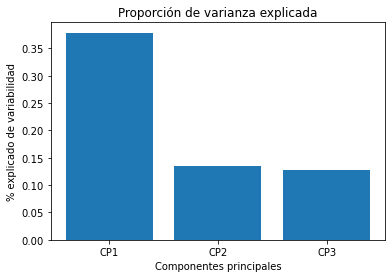

In [26]:
# Datos para las barras
categorias = ['CP1', 'CP2', 'CP3']
valores = varibilidad_explicada[:3]

# Crear el gráfico de barras
plt.bar(categorias, valores)

# Agregar etiquetas y título
plt.xlabel('Componentes principales')
plt.ylabel('% explicado de variabilidad')
plt.title('Proporción de varianza explicada')

# Mostrar el gráfico
plt.show()


Así, encontramos que a partir de los tres componentes principales se recoge el 63,8% de la variabilidad total de Z, distribuido de la siguiente manera:

- El primer componente principal explica el 37,8% del total de la varianza.

- El segundo componente principal explica el 13,4% del total de la varianza.

- El tercer componente principal explica el 12,6% del total de la varianza.

### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

In [58]:
X_pca=(Z.dot(eig_vec[[0]].T)+Z.dot(eig_vec[[1]].T)+Z.dot(eig_vec[[2]].T))
X_pca
X_pca_ordenado = X_pca.sort_values(by=0, ascending=False)
X_pca_ordenado
puntuaciones_y_Variables = pd.merge(X_pca_ordenado, f1, on="Ciudad")
puntuaciones_y_Variables = pd.merge(puntuaciones_y_Variables, f2, on="Ciudad")
puntuaciones_y_Variables = pd.merge(puntuaciones_y_Variables, f3, on="Ciudad")

puntuaciones_y_Variables.head(5)

,0,CP1,CP2,CP3
Ciudad,,,,
"New-York,NY",10.574269,12.426251,-2.061746,0.209764
"San-Francisco,CA",10.310155,7.391403,1.227000,1.691752
"Los-Angeles,Long-Beach,CA",9.774419,7.246307,0.477152,2.050960
"San-Diego,CA",7.660106,3.671532,1.403574,2.585000
"Anaheim-Santa-Ana,CA",7.346033,2.973048,2.015275,2.357710


In [62]:
media_CP1 = puntuaciones_y_Variables["CP1"].median()
media_CP2 = puntuaciones_y_Variables["CP2"].median()
media_CP3 = puntuaciones_y_Variables["CP3"].median()
print(media_CP1, media_CP2, media_CP3)

-0.4237235738823566 -0.14370825604812498 0.0002504345778900907


Para encontrar las 5 ciudades ciudades calidad de vida inusualmente alta, se sumaron las puntuaciones de cada componente por ciudad en "X_pca" y se agrego la puntuación de cada componente para la comparación, despues de esto se encuentra la mediana de las puntuaciones de cada componente. 

De acuerdo con lo anterior encontramos que los resultados obtenidos por las ciudades (New York, San Francisco, Los Angeles, San Diego y Anaheim Santa Ana), en cada componente son atipicos comparados con la medida de tendencia central (Mediana) que organiza las observaciones y muestra cual es el valor del medio. siendo asi los resultados obtenidos por las 5 ciudades con calidad de vida inusualmente alta, un atipico en cada componente. 